## Problem Statement

### Business Context

Streamist is a streaming company that streams web series and movies for a worldwide audience. Every content on their portal is rated by the viewers, and the portal also provides other information for the content like the number of people who have watched it, the number of people who want to watch it, the number of episodes, duration of an episode, etc.

They are currently focusing on the anime available in their portal, and want to identify the most important factors involved in rating an anime. You as a data scientist at Streamist are tasked with identifying the important factors and building a predictive model to predict the rating on an anime.


### Objective

To analyze the data and build a linear regression model to predict the ratings of anime.


## Key Questions

1. What are the key factors influencing the rating of an anime?
2. Is there a good predictive model for the rating of an anime? What does the performance assessment look like for such a model?


### Data Description

Each record in the database provides a description of an anime. A detailed data dictionary can be found below.

**Data Dictionary**

- title - the title of anime
- description - the synopsis of the plot
- mediaType - format of publication
- eps - number of episodes (movies are considered 1 episode)
- duration - duration of an episode in minutes
- ongoing - whether it is ongoing
- sznOfRelease - the season of release (Winter, Spring, Fall)
- years_running - number of years the anime ran/is running
- studio_primary - primary studio of production
- studios_colab - whether there was a collaboration between studios to produce the anime
- contentWarn - whether anime has a content warning
- watched - number of users that completed it
- watching - number of users that are watching it
- wantWatch - number of users that want to watch it
- dropped - number of users that dropped it before completion
- rating - average user rating
- votes - number of votes that contribute to rating
- tag_Based_on_a_Manga - whether the anime is based on a manga
- tag_Comedy - whether the anime is of Comedy genre
- tag_Action - whether the anime is of Action genre
- tag_Fantasy - whether the anime is of Fantasy genre
- tag_Sci_Fi - whether the anime is of Sci-Fi genre
- tag_Shounen - whether the anime has a tag Shounen
- tag_Original_Work - whether the anime is an original work
- tag_Non_Human_Protagonists - whether the anime has any non-human protagonists
- tag_Drama - whether the anime is of Drama genre
- tag_Adventure - whether the anime is of Adventure genre
- tag_Family_Friendly - whether the anime is family-friendly
- tag_Short_Episodes - whether the anime has short episodes
- tag_School_Life - whether the anime is regarding school life
- tag_Romance - whether the anime is of Romance genre
- tag_Shorts - whether the anime has a tag Shorts
- tag_Slice_of_Life - whether the anime has a tag Slice of Life
- tag_Seinen - whether the anime has a tag Seinen
- tag_Supernatural - whether the anime has a tag Supernatural
- tag_Magic - whether the anime has a tag Magic
- tag_Animal_Protagonists - whether the anime has animal protagonists
- tag_Ecchi - whether the anime has a tag Ecchi
- tag_Mecha - whether the anime has a tag Mecha
- tag_Based_on_a_Light_Novel - whether the anime is based on a light novel
- tag_CG_Animation - whether the anime has a tag CG Animation
- tag_Superpowers - whether the anime has a tag Superpowers
- tag_Others - whether the anime has other tags
- tag_is_missing - whether tag is missing or not

### Lessons Learned
* It almost seems like doing an initial run through with minimal assumptions (a rough draft of sorts) is the easiest way to start solving problems like these.
    * There were several features within the dataset that were obviously in need of some transformation, but seeing that backed up in the summary further strenghtens those findings.
* Use log (ln) transformations for heavily right skewed data and square root transformations for moderately right skewed data.  Use squares when dealing with data that shows a clear curve (exponential).

### Questions Remaining

* I do believe combining the watched and votes columns make sense.  But multiplying the two together could skew the results if one column or the other is a zero.  While this seems like a very common approach, I wonder if adding the two together makes more sense.
* I'm still confused as to why the 'is_missing' values were not dealt with in the solution notebook as it is definitely being used to indicate that data is null.
* Would it make sense to combine some of the tags together?  Fantasy and magic seem to be correlated along with the non human protagonist and animal tags.  Maybe the approach is to simply do a scatterplot against all tags with rating as the y column.  It's possible there simply isn't enough of a relationship to justify the amount of work.

## Approach

This time we'll deal with the missing data, data transformations, and multicollinearity up front to see if we can't get a better result.  Additionally, we will cut out the tags for now just to reduce overall complexity.

### Import Libraries

In [49]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test sets
from sklearn.model_selection import train_test_split

# to assist in selecting the optimal model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# to build a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# To build linear regression_model
import statsmodels.api as sm
import statsmodels.stats.api as sms
import pylab
import scipy.stats as stats
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

### Load Data and Review

In [2]:
data = pd.read_csv('data/anime_data.csv', na_values=["is_missing"])
data.head(20)

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,TV,64,NaN,False,Spring,1,Bones,0,1,103707.0,14351,25810,2656,4.702,86547,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,your name.,Mitsuha and Taki are two total strangers livin...,Movie,1,107.0,False,NaN,0,Others,0,0,58831.0,1453,21733,124,4.663,43960,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,A Silent Voice,"After transferring into a new school, a deaf g...",Movie,1,130.0,False,NaN,0,Kyoto Animation,0,1,45892.0,946,17148,132,4.661,33752,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"Picking up where the second season ended, the ...",TV,10,NaN,False,Fall,0,Production I.G,0,0,25134.0,2183,8082,167,4.660,17422,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,The battle to retake Wall Maria begins now! Wi...,TV,10,NaN,False,Spring,0,Others,0,1,21308.0,3217,7864,174,4.650,15789,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Demon Slayer: Kimetsu no Yaiba,"Bloodthirsty demons lurk in the woods, and nob...",TV,26,NaN,False,Spring,0,Others,0,1,28708.0,10844,13156,600,4.647,24765,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Haikyuu!! Second Season,"After losing to Aoba Johsai at the Inter-High,...",TV,25,NaN,False,Fall,1,Production I.G,0,0,31329.0,3861,8664,264,4.639,22819,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Hunter x Hunter (2011),"Drawn to the mystique of the unknown, Hunters ...",TV,148,NaN,False,Fall,3,MADHOUSE,0,1,50195.0,17730,19219,2132,4.635,46853,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,Gintama Kanketsu-hen: Yorozuya yo Eien Nare,"While watching a movie, Gintoki comes upon a ""...",Movie,1,111.0,False,NaN,0,Sunrise,0,0,8454.0,280,6624,150,4.625,6254,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Gintama (2015),Fourth season of Gintama.,TV,51,NaN,False,Spring,1,Others,0,0,7862.0,3154,10565,647,4.622,7654,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
# Create a new dataset after dropping tags
# Will use to continue cleanin the dataset
clean_data = data.drop(columns=data.filter(regex='^tag').columns)
clean_data.head()

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,TV,64,NaN,False,Spring,1,Bones,0,1,103707.0,14351,25810,2656,4.702,86547
1,your name.,Mitsuha and Taki are two total strangers livin...,Movie,1,107.0,False,NaN,0,Others,0,0,58831.0,1453,21733,124,4.663,43960
2,A Silent Voice,"After transferring into a new school, a deaf g...",Movie,1,130.0,False,NaN,0,Kyoto Animation,0,1,45892.0,946,17148,132,4.661,33752
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"Picking up where the second season ended, the ...",TV,10,NaN,False,Fall,0,Production I.G,0,0,25134.0,2183,8082,167,4.660,17422
4,Attack on Titan 3rd Season: Part II,The battle to retake Wall Maria begins now! Wi...,TV,10,NaN,False,Spring,0,Others,0,1,21308.0,3217,7864,174,4.650,15789


In [4]:
# We already know the data is evenly distributed across the seasons and that over 80% of that data is missing so can drop that column
# Additionally, the title and description are unique across the board so they won't help here
clean_data.drop(['title', 'description', 'sznOfRelease'], axis=1, inplace=True)
clean_data.head()

,mediaType,eps,duration,ongoing,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,TV,64,NaN,False,1,Bones,0,1,103707.0,14351,25810,2656,4.702,86547
1,Movie,1,107.0,False,0,Others,0,0,58831.0,1453,21733,124,4.663,43960
2,Movie,1,130.0,False,0,Kyoto Animation,0,1,45892.0,946,17148,132,4.661,33752
3,TV,10,NaN,False,0,Production I.G,0,0,25134.0,2183,8082,167,4.660,17422
4,TV,10,NaN,False,0,Others,0,1,21308.0,3217,7864,174,4.650,15789


In [5]:
# Check for null values
clean_data.isna().sum()

mediaType           63
eps                  0
duration          4636
ongoing              0
years_running        0
studio_primary    3208
studios_colab        0
contentWarn          0
watched              0
watching             0
wantWatch            0
dropped              0
rating               0
votes                0
dtype: int64

In [6]:
# We'll deal with mediaType and studio_primary first as the duration is a bit more involved
print(clean_data['mediaType'].unique())
print(clean_data['studio_primary'].unique())

['TV' 'Movie' 'Web' 'TV Special' 'OVA' nan 'DVD Special' 'Other'
 'Music Video']
['Bones' 'Others' 'Kyoto Animation' 'Production I.G' 'MADHOUSE' 'Sunrise'
 'A-1 Pictures' 'Shaft' nan 'Studio Deen' 'J.C. Staff' 'TMS Entertainment'
 'Studio Pierrot' 'Toei Animation' 'Tatsunoko Production' 'AIC'
 'Nippon Animation' 'Shin-Ei Animation' 'GONZO' 'OLM' 'XEBEC' 'DLE']


In [7]:
# Since we have a category for other, fill in the nulls with that value makes the most sense
clean_data['mediaType'].fillna('Other', inplace=True)
clean_data['studio_primary'].fillna('Others', inplace=True)
clean_data.isna().sum()

mediaType            0
eps                  0
duration          4636
ongoing              0
years_running        0
studio_primary       0
studios_colab        0
contentWarn          0
watched              0
watching             0
wantWatch            0
dropped              0
rating               0
votes                0
dtype: int64

In [8]:
# We already know from our previous attempt that there are a large number of outliers for most of the mediaType categories
# In the couple of situations where there were no outliers the median and average were very close in value so we'll use the median
clean_data['duration'] = clean_data['duration'].fillna(clean_data.groupby('mediaType')['duration'].transform('median'))
clean_data.isna().sum()

mediaType         0
eps               0
duration          0
ongoing           0
years_running     0
studio_primary    0
studios_colab     0
contentWarn       0
watched           0
watching          0
wantWatch         0
dropped           0
rating            0
votes             0
dtype: int64

In [9]:
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
eps,12101.0,13.393356,57.925097,1.000,1.000,2.000,12.000,2527.000
duration,12101.0,19.604248,26.942097,1.000,5.000,5.000,28.000,163.000
years_running,12101.0,0.283200,1.152234,0.000,0.000,0.000,0.000,51.000
studios_colab,12101.0,0.051649,0.221326,0.000,0.000,0.000,0.000,1.000
contentWarn,12101.0,0.115362,0.319472,0.000,0.000,0.000,0.000,1.000
watched,12101.0,2862.605694,7724.347024,0.000,55.000,341.000,2026.000,161567.000
watching,12101.0,256.334435,1380.840902,0.000,2.000,14.000,100.000,74537.000
wantWatch,12101.0,1203.681431,2294.327380,0.000,49.000,296.000,1275.000,28541.000
dropped,12101.0,151.568383,493.931710,0.000,3.000,12.000,65.000,19481.000
rating,12101.0,2.949037,0.827385,0.844,2.304,2.965,3.616,4.702


In [10]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mediaType       12101 non-null  object 
 1   eps             12101 non-null  int64  
 2   duration        12101 non-null  float64
 3   ongoing         12101 non-null  bool   
 4   years_running   12101 non-null  int64  
 5   studio_primary  12101 non-null  object 
 6   studios_colab   12101 non-null  int64  
 7   contentWarn     12101 non-null  int64  
 8   watched         12101 non-null  float64
 9   watching        12101 non-null  int64  
 10  wantWatch       12101 non-null  int64  
 11  dropped         12101 non-null  int64  
 12  rating          12101 non-null  float64
 13  votes           12101 non-null  int64  
dtypes: bool(1), float64(3), int64(8), object(2)
memory usage: 1.2+ MB


In [11]:
# Let's go ahead and get everything into a nice numercial format
clean_data['ongoing'] = clean_data['ongoing'].astype('int')
clean_data = pd.get_dummies(clean_data, columns=['mediaType'], drop_first=True)
clean_data.drop(['studio_primary'], axis=1, inplace=True)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   eps                    12101 non-null  int64  
 1   duration               12101 non-null  float64
 2   ongoing                12101 non-null  int32  
 3   years_running          12101 non-null  int64  
 4   studios_colab          12101 non-null  int64  
 5   contentWarn            12101 non-null  int64  
 6   watched                12101 non-null  float64
 7   watching               12101 non-null  int64  
 8   wantWatch              12101 non-null  int64  
 9   dropped                12101 non-null  int64  
 10  rating                 12101 non-null  float64
 11  votes                  12101 non-null  int64  
 12  mediaType_Movie        12101 non-null  uint8  
 13  mediaType_Music Video  12101 non-null  uint8  
 14  mediaType_OVA          12101 non-null  uint8  
 15  me

## Exploratory Data Analysis

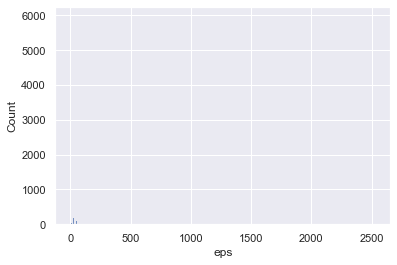

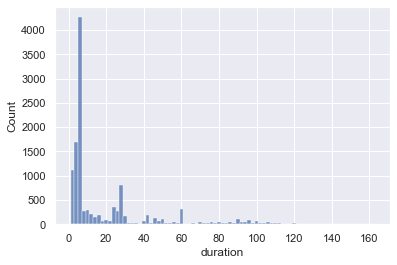

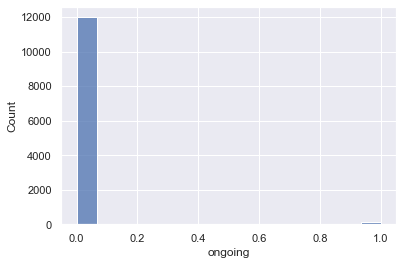

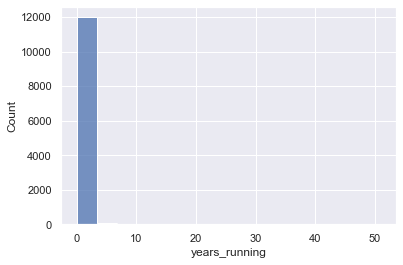

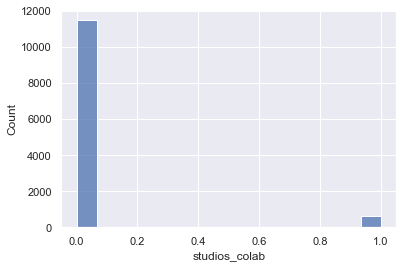

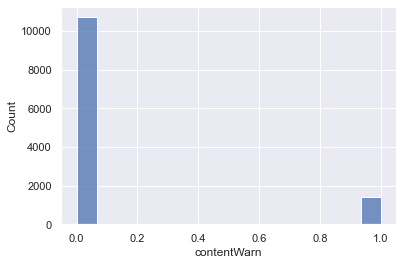

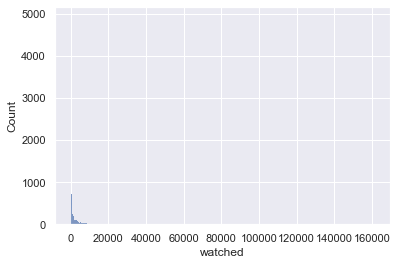

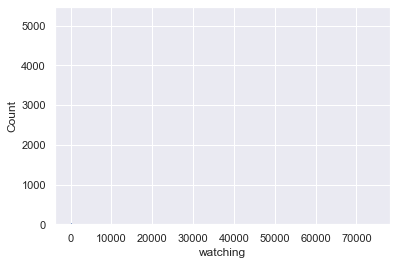

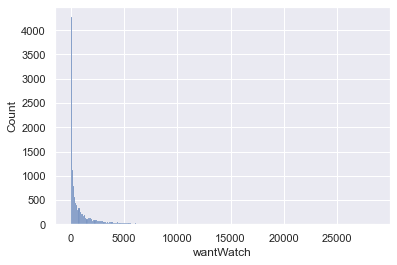

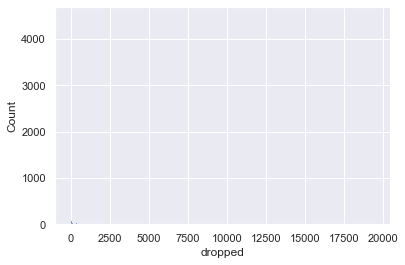

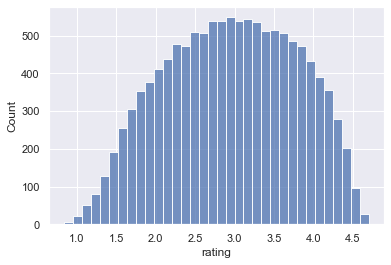

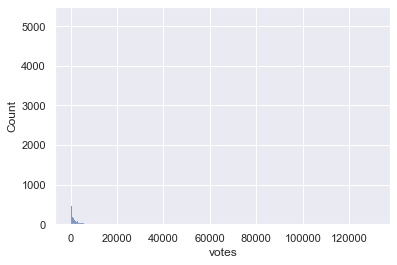

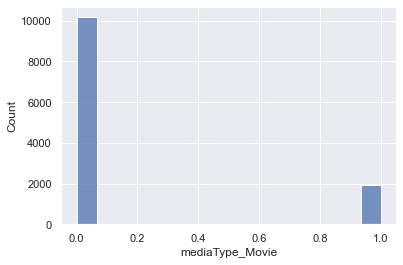

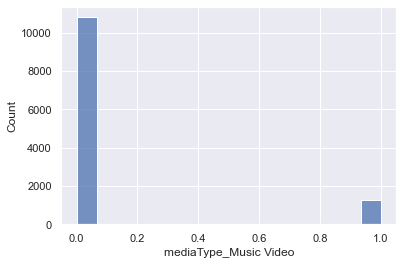

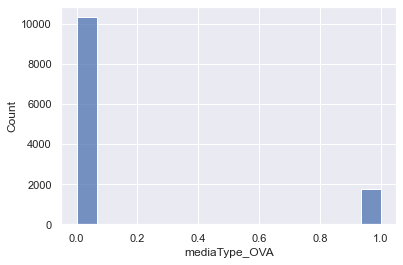

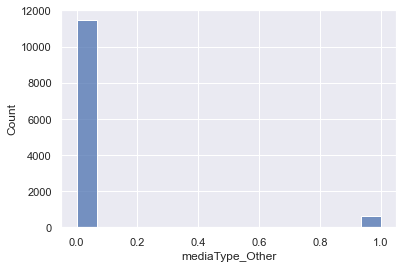

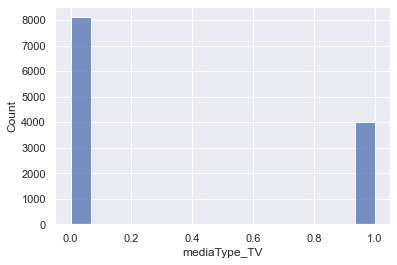

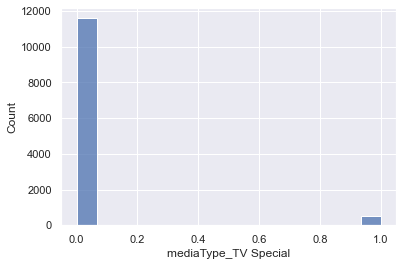

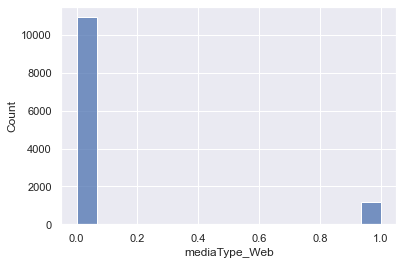

In [12]:
for column in clean_data:
    sns.histplot(data=clean_data, x=column)
    plt.show();

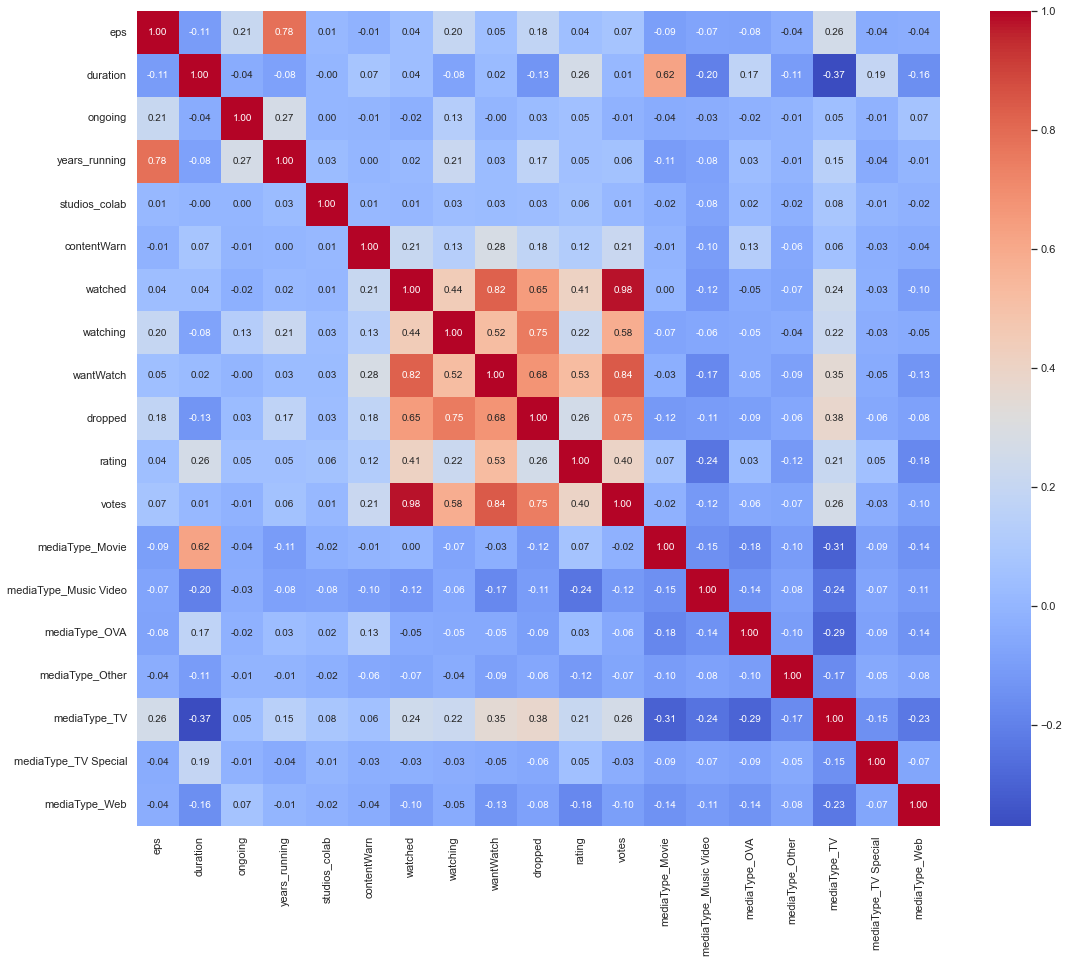

In [13]:
plt.figure(figsize=(18,15))
sns.heatmap(clean_data.corr(), fmt='0.2f', annot=True, cmap="coolwarm")
plt.show();

### Diving Deeper into Correlations that Indicate Popularity

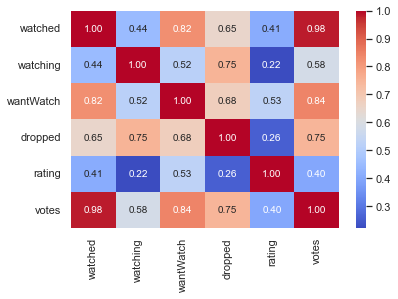

In [14]:
pop_data = clean_data[['watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes']]
sns.heatmap(pop_data.corr(), fmt='0.2f', annot=True, cmap="coolwarm")
plt.show();

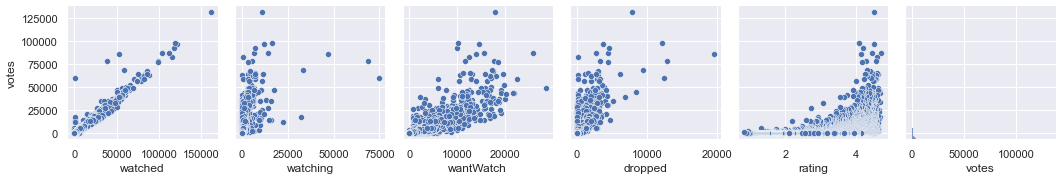

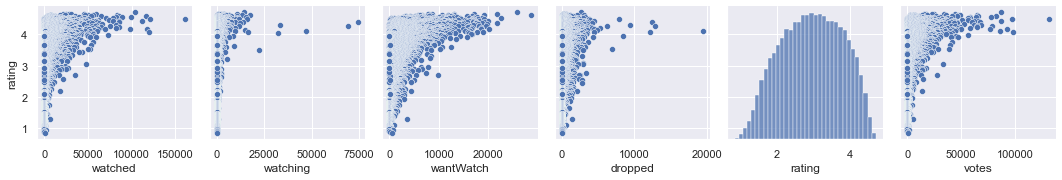

In [15]:
sns.pairplot(pop_data, y_vars='votes')
plt.show();

sns.pairplot(pop_data, y_vars='rating')
plt.show();

c:\Users\jimmyb\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


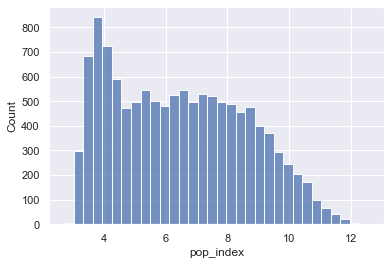

,watched,watching,wantWatch,dropped,rating,votes,pop_index
9116,5.0,14,47,5,2.293,10,2.708050
3611,6.0,17,190,5,3.486,11,2.833213
8622,6.0,10,22,2,2.412,11,2.833213
8878,8.0,9,40,3,2.351,10,2.890372
10377,8.0,10,193,7,1.964,11,2.944439


In [17]:
pop_data['pop_index'] = np.log(pop_data['votes'] + pop_data['watched'])
sns.histplot(data=pop_data, x='pop_index')
plt.show();
pop_data.sort_values(by='pop_index').head()

c:\Users\jimmyb\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


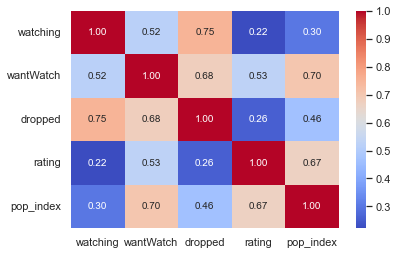

In [18]:
pop_data.drop(['watched', 'votes'], axis=1, inplace=True)
sns.heatmap(pop_data.corr(), fmt='0.2f', annot=True, cmap="coolwarm")
plt.show();

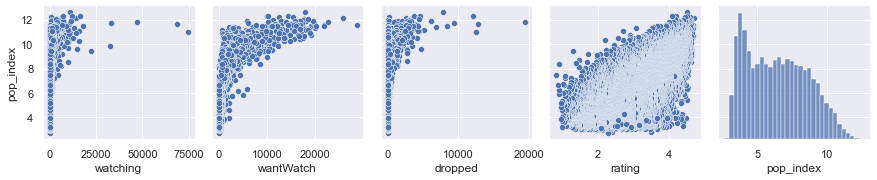

In [19]:
sns.pairplot(pop_data, y_vars='pop_index')
plt.show();

c:\Users\jimmyb\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


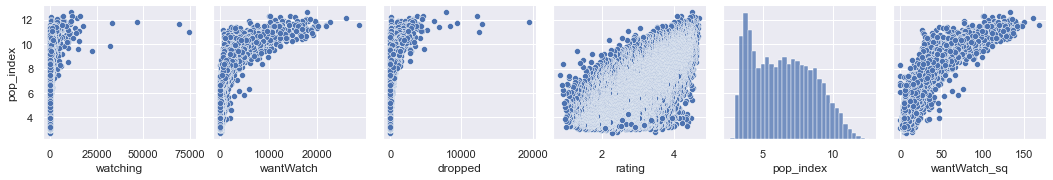

In [20]:
pop_data['wantWatch_sq'] = np.sqrt(pop_data['wantWatch'])
sns.pairplot(pop_data, y_vars='pop_index')
plt.show();

c:\Users\jimmyb\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jimmyb\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


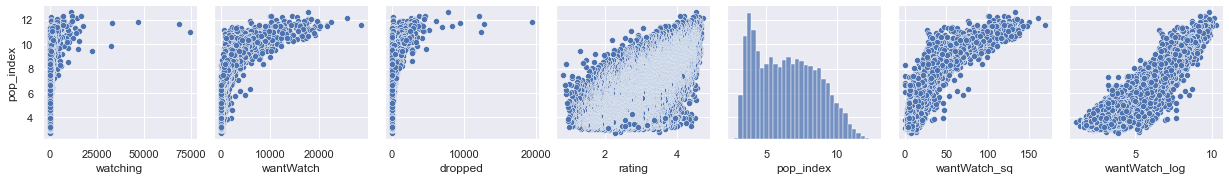

In [21]:
pop_data['wantWatch_log'] = np.log(pop_data['wantWatch'])
sns.pairplot(pop_data, y_vars='pop_index')
plt.show();

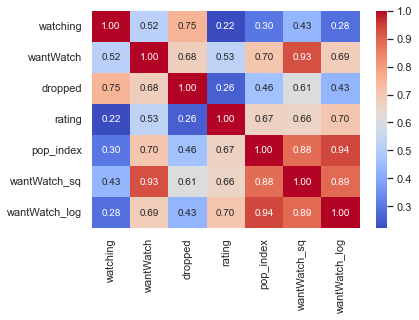

In [22]:
sns.heatmap(pop_data.corr(), fmt='0.2f', annot=True, cmap="coolwarm")
plt.show();

It looks like taking the log of wantWatch, watched, and the votes column and then adding them all together may be the right approach at creating a popularity index that would alleviate the multicollinearity that exists in the dataset.

       watching  dropped  rating  pop_index
9163          0        0   2.281   3.135494
10982         0        0   1.776   3.367296
11190         1        1   1.702   3.367296
10981         0        0   1.776   3.367296
10925         0        0   1.795   3.367296


c:\Users\jimmyb\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\Users\jimmyb\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


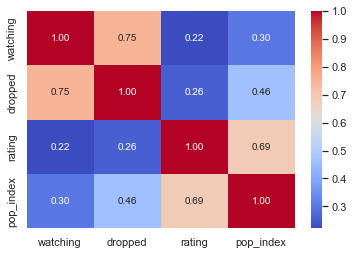

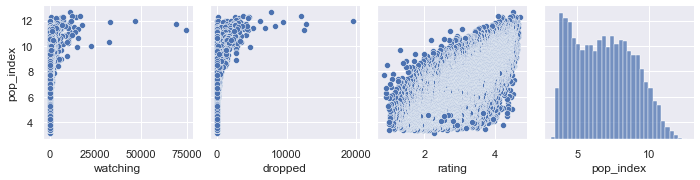

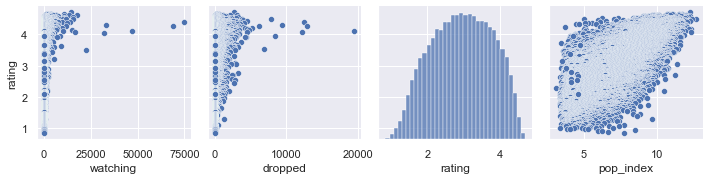

In [25]:
pop_data = clean_data[['watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes']]
pop_data['pop_index'] = np.log(pop_data['votes'] + pop_data['watched'] + pop_data['wantWatch'])
pop_data.drop(['votes', 'watched', 'wantWatch'], axis=1, inplace=True)
print(pop_data.sort_values(by='pop_index').head())
sns.heatmap(pop_data.corr(), fmt='0.2f', annot=True, cmap="coolwarm")
plt.show();
sns.pairplot(pop_data, y_vars='pop_index')
plt.show();
sns.pairplot(pop_data, y_vars='rating')
plt.show();

There is still some heavily skewed data within the dataset, but I think combining those three columns into one was the right move as it removed the multicollinearity while providing a single variable that has high correlation for the rating variable we are trying to predict.  Now that we've validated those findings, let's update the main dataset we're working with to reflect this.

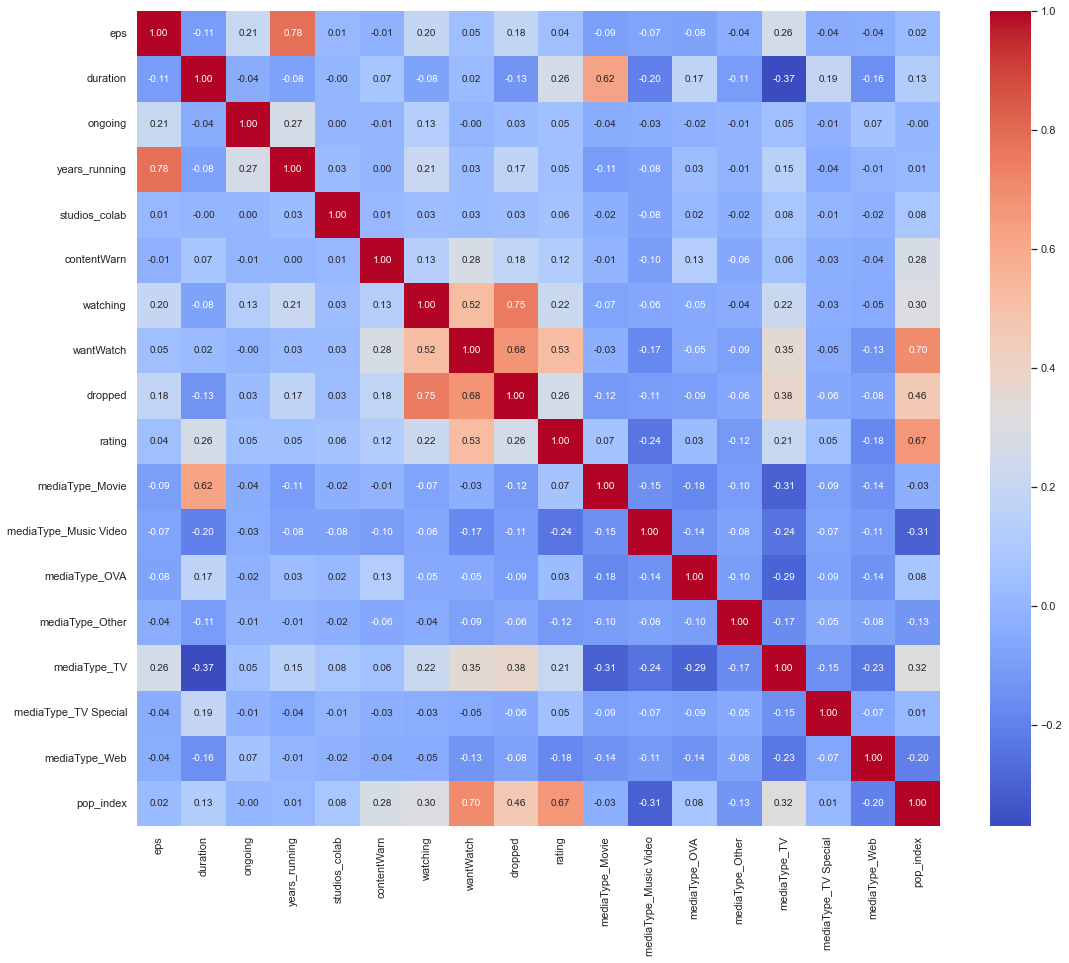

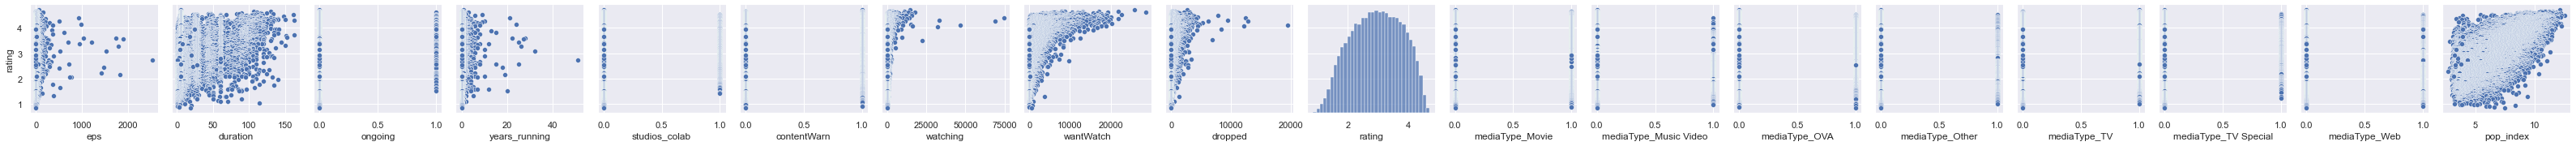

In [26]:
# Tried this approach and I think it's too much as it causes OLS to fail; Switching to just combining the two columns
# clean_data['pop_index'] = (np.log(clean_data['votes']) + np.log(clean_data['watched']) + np.log(clean_data['wantWatch']))
# clean_data.drop(['votes', 'watched', 'wantWatch'], axis=1, inplace=True)
clean_data['pop_index'] = np.log(clean_data['votes'] + clean_data['watched'])
clean_data.drop(['votes', 'watched'], axis=1, inplace=True)
plt.figure(figsize=(18,15))
sns.heatmap(clean_data.corr(), fmt='0.2f', annot=True, cmap="coolwarm")
plt.show();
sns.pairplot(clean_data, y_vars='rating')
plt.show();

It looks like the duration and pop_index columns will likely have the highest impact on ratings in our model

## Creating the Model

In [27]:
model_data = clean_data

X = model_data.drop(['rating'], axis=1)
y = model_data['rating']
X = sm.add_constant(X)

# Using 80/20 split since we have a good amount of data
# If we had less than 2,000 or so I might be inclined to go with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=23
)

olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     619.9
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:27:44   Log-Likelihood:                -8302.7
No. Observations:                9680   AIC:                         1.664e+04
Df Residuals:                    9662   BIC:                         1.677e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.53

## Checking for Multicollinearity

In [28]:
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    35.454712
eps                       3.081745
duration                  2.318074
ongoing                   1.120732
years_running             3.123986
studios_colab             1.018032
contentWarn               1.127674
watching                  2.576911
wantWatch                 3.035982
dropped                   3.478288
mediaType_Movie           3.841532
mediaType_Music Video     2.472508
mediaType_OVA             2.859174
mediaType_Other           1.721539
mediaType_TV              4.255469
mediaType_TV Special      1.698413
mediaType_Web             2.289322
pop_index                 2.429529
dtype: float64



We still have a few columns that have a value higher than 2 specifically with the mediaType columns and since those likely won't influence ratings much, it makes sense to drop them.

In [31]:
X_train2 = X_train.drop(columns=X_train.filter(regex='^mediaType').columns)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const            15.377225
eps               2.899705
duration          1.076273
ongoing           1.111568
years_running     3.015950
studios_colab     1.010248
contentWarn       1.111178
watching          2.545365
wantWatch         2.946536
dropped           3.402073
pop_index         2.110557
dtype: float64



In [32]:
olsmod2 = sm.OLS(y_train, X_train2)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     1011.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:37:53   Log-Likelihood:                -8409.3
No. Observations:                9680   AIC:                         1.684e+04
Df Residuals:                    9669   BIC:                         1.692e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3872      0.023     60.303

In [33]:
# Dropping media types didn't result in much reduction in accuracy, but we still have quite a few columns exhibiting multicollinearity
X_train3 = X_train2.drop(['dropped'], axis=1)

vif_series3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const            15.344139
eps               2.893251
duration          1.043489
ongoing           1.098350
years_running     3.014624
studios_colab     1.010234
contentWarn       1.111164
watching          1.467812
wantWatch         2.557064
pop_index         2.098322
dtype: float64



In [34]:
X_train4 = X_train3.drop(['years_running'], axis=1)

vif_series4 = pd.Series(
    [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])],
    index=X_train4.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const            15.339522
eps               1.103339
duration          1.043251
ongoing           1.067681
studios_colab     1.009245
contentWarn       1.110156
watching          1.447372
wantWatch         2.548087
pop_index         2.098252
dtype: float64



In [35]:
X_train5 = X_train4.drop(['wantWatch'], axis=1)

vif_series5 = pd.Series(
    [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])],
    index=X_train5.columns,
)
print("VIF values: \n\n{}\n".format(vif_series5))

VIF values: 

const            11.004876
eps               1.101296
duration          1.038809
ongoing           1.063710
studios_colab     1.007509
contentWarn       1.093872
watching          1.164369
pop_index         1.198689
dtype: float64



In [36]:
# Now that we've dealt with the multicollinearity, let's run the model again and remove any unnecessary columns
olsmod5 = sm.OLS(y_train, X_train5)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     1307.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:41:59   Log-Likelihood:                -8649.4
No. Observations:                9680   AIC:                         1.731e+04
Df Residuals:                    9672   BIC:                         1.737e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2208      0.020     61.207

In [37]:
X_train6 = X_train5.drop(['studios_colab'], axis=1)
olsmod6 = sm.OLS(y_train, X_train6)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     1525.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:42:47   Log-Likelihood:                -8649.4
No. Observations:                9680   AIC:                         1.731e+04
Df Residuals:                    9673   BIC:                         1.736e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2208      0.020     61.210      

Just out of curiosity, what's happens if we only use the pop_index and duration columns

In [38]:
X_train7 = X_train6.drop(['eps', 'ongoing', 'contentWarn', 'watching'], axis=1)
olsmod7 = sm.OLS(y_train, X_train7)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     4389.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:44:49   Log-Likelihood:                -8747.5
No. Observations:                9680   AIC:                         1.750e+04
Df Residuals:                    9677   BIC:                         1.752e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2408      0.019     64.081      0.0

In [39]:
X_train8 = X_train7.drop(['duration'], axis=1)
olsmod8 = sm.OLS(y_train, X_train8)
olsres8 = olsmod8.fit()
print(olsres8.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     7701.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:45:28   Log-Likelihood:                -9038.7
No. Observations:                9680   AIC:                         1.808e+04
Df Residuals:                    9678   BIC:                         1.810e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2944      0.020     65.287      0.0

Suprisingly model 6 was the one that did the best

## Testing for Linearity

   Actual Values  Fitted Values  Residuals
0          3.215       3.250536  -0.035536
1          2.906       2.354178   0.551822
2          2.195       2.077565   0.117435
3          3.673       3.680457  -0.007457
4          2.539       3.090109  -0.551109


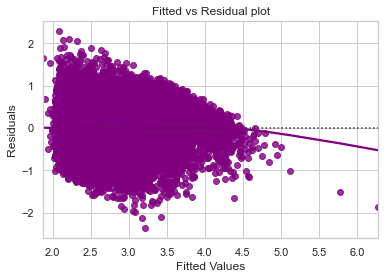

In [40]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres6.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres6.resid.values  # residuals

print(df_pred.head())

# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

## Test for Normality

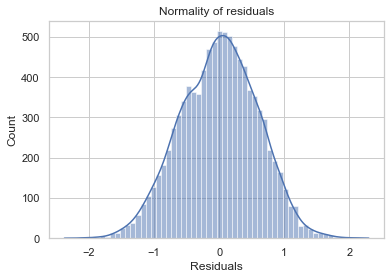

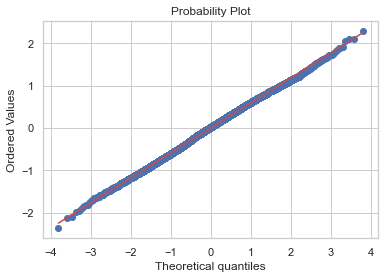

In [41]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

## Test for Homoscedasticity

In [42]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train8)
lzip(name, test)

[('F statistic', 0.9443538415346334), ('p-value', 0.9767565515743488)]

## Model Test

In [46]:
columns_to_select = X_train6.columns.tolist()
X_test2 = X_test[columns_to_select]
X_test2.head()

,const,eps,duration,ongoing,contentWarn,watching,pop_index
8961,1.0,13,4.0,0,0,187,7.984463
12028,1.0,12,4.0,0,0,16,4.919981
8324,1.0,12,5.0,0,0,21,6.302619
11766,1.0,2,2.0,0,0,2,3.850148
3529,1.0,154,5.0,1,0,22446,9.472051


In [47]:
y_pred = olsres6.predict(X_test2)
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae2 = mean_absolute_error(y_test, y_pred)

